## import Packages

In [9]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
%matplotlib inline

/afs/inf.ed.ac.uk/user/s19/s1962306/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/afs/inf.ed.ac.uk/user/s19/s1962306/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Description of the dataset

focus on size, data ranges, and data types

In [56]:
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
regression_part1 = pd.read_csv(data_path, delimiter = ',')
regression_part1

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974
5,4.080,27.086
6,5.674,26.136
7,6.060,27.038
8,6.347,31.283
9,6.819,14.731


In [36]:
# focus on size, data ranges, and data types
row,col=regression_part1.shape
print('Data Description:\nNumber of data:{0}\nNumber of Attribute:{1}'.format(row,col))
regression_part1.describe()
print('Data size is:',regression_part1.size)
regression_part1.dtypes
#print('revision_time range from',regression_part1.loc[regression_part1['revision_time']].max())

Data Description:
Number of data:50
Number of Attribute:2
Data size is: 100


revision_time    float64
exam_score       float64
dtype: object

In [38]:
regression_part1.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


## Linear Regression

(b) (3 points) Fit a linear model to the data so that we can predict exam_score from revision_time. Report the estimated model parameters w. Describe what the parameters represent for this 1D data. For this part, you should use the sklearn implementation of Linear Regression.
Hint:  By default in sklearn fit_intercept = True.  Instead, set fit_intercept=False and pre-pend1 to each value of xi yourself to create φ(xi) = [1,xi]

In [81]:
## prepare dataset for training
prepend_array = np.full((50,1),1)
x0=regression_part1['revision_time'].as_matrix()
x0.reshape(50,1)

/afs/inf.ed.ac.uk/user/s19/s1962306/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 2.723],
       [ 2.844],
       [ 3.303],
       [ 3.588],
       [ 4.05 ],
       [ 4.08 ],
       [ 5.674],
       [ 6.06 ],
       [ 6.347],
       [ 6.819],
       [ 7.098],
       [ 7.515],
       [ 8.356],
       [ 9.214],
       [10.364],
       [10.51 ],
       [12.102],
       [13.187],
       [16.692],
       [16.977],
       [18.33 ],
       [19.599],
       [20.321],
       [21.28 ],
       [21.578],
       [21.798],
       [22.048],
       [24.949],
       [25.147],
       [26.495],
       [26.535],
       [28.687],
       [29.055],
       [31.043],
       [32.176],
       [32.203],
       [32.226],
       [32.268],
       [32.711],
       [32.886],
       [34.489],
       [34.889],
       [37.299],
       [40.875],
       [41.249],
       [45.213],
       [45.397],
       [46.923],
       [47.818],
       [48.011]])

In [119]:
x=np.column_stack((prepend_array,x0))
x

array([[ 1.   ,  2.723],
       [ 1.   ,  2.844],
       [ 1.   ,  3.303],
       [ 1.   ,  3.588],
       [ 1.   ,  4.05 ],
       [ 1.   ,  4.08 ],
       [ 1.   ,  5.674],
       [ 1.   ,  6.06 ],
       [ 1.   ,  6.347],
       [ 1.   ,  6.819],
       [ 1.   ,  7.098],
       [ 1.   ,  7.515],
       [ 1.   ,  8.356],
       [ 1.   ,  9.214],
       [ 1.   , 10.364],
       [ 1.   , 10.51 ],
       [ 1.   , 12.102],
       [ 1.   , 13.187],
       [ 1.   , 16.692],
       [ 1.   , 16.977],
       [ 1.   , 18.33 ],
       [ 1.   , 19.599],
       [ 1.   , 20.321],
       [ 1.   , 21.28 ],
       [ 1.   , 21.578],
       [ 1.   , 21.798],
       [ 1.   , 22.048],
       [ 1.   , 24.949],
       [ 1.   , 25.147],
       [ 1.   , 26.495],
       [ 1.   , 26.535],
       [ 1.   , 28.687],
       [ 1.   , 29.055],
       [ 1.   , 31.043],
       [ 1.   , 32.176],
       [ 1.   , 32.203],
       [ 1.   , 32.226],
       [ 1.   , 32.268],
       [ 1.   , 32.711],
       [ 1.   , 32.886],


In [136]:
#x_train=regression_part1['revision_time'][:,np.newaxis]
x_train=x
y_train=regression_part1['exam_score'][:,np.newaxis]

#train a simple linear regression model
regressor=LinearRegression(fit_intercept=False)
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [137]:
# Report its parameters
weight = regressor.coef_
#print('Weight :{}'.format('%.3f'%weight))
#print('intercept:{}'.format('%.3f'%intercp))
weight

array([[17.89768026,  1.44114091]])

#### (c) (3 points) Display the fitted linear model and the input data on the same plot

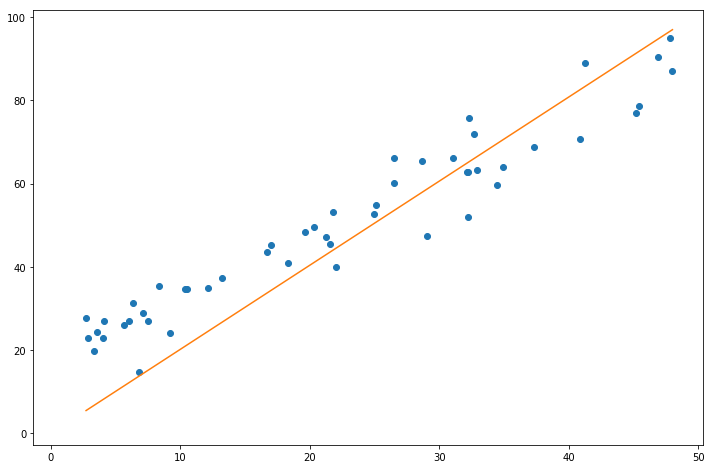

In [131]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(regression_part1['revision_time'],y_train,label='Trainning data')
ax.plot(x,2.02*x,label='Linear Regression')

#### (d) (3 points) Instead of using sklearn, implement the closed-form solution for fitting alinear regression model yourself using numpy array operations. Report your code in theanswer box. It should only take a few lines (i.e. <5).Hint: Only report the relevant lines for estimatingwe.g. we do not need to see the dataloading code. You can write the code in the answer box directly or paste in an image ofit